## Observations and Insights 

%load_ext lab_black

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

## why can't i string all these replaces together?
# Reformat column headers
df = df.rename(columns = lambda header_str: header_str.lower().replace(" ","_").replace(")","").replace("(",""))

# df["mouseid"] = df["mouse_id"]

# Display the data table for preview
df.head()
# df.shape

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.
id_count = df["mouse_id"].value_counts()

# id_count = id_count.filter(items = "1", axis = 1)
# print(id_count)

df["id_count"] = id_count

df.head()

lst = []

def count_function(i):
    for i in df["id_count"]:
        if i == 1:
            lst.append(df["mouse_id"])
    return lst

data = [[count_function(i)] for i in df]
# data.head()
print(data)

[[[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]], [[]]]


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# counts = df.groupby(["mouse_id"]).value_counts()

# counts.head()
# # df.shape
# # df.head()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


In [50]:
df.head()

,mouse_id,drug_regimen,sex,age_months,weight_g,timepoint,tumor_volume_mm3,metastatic_sites,id_count
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN


## Summary Statistics

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


# Get only the data I need for this
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen)

# how many regimens? 
regimen_count = len(df_regimen["drug_regimen"].unique())
# print(f"There are {regimen_count} regimens")

# get the mean
regimen_mean = df_regimen.groupby(by = ["drug_regimen"]).mean()
# print(regimen_mean.shape)

# get the median
regimen_median = df_regimen.groupby(by = ["drug_regimen"]).median()
# print(regimen_median.shape)

# get the variance
regimen_variance = df_regimen.groupby(by = ["drug_regimen"]).var()
# print(regimen_variance.shape)

# get the standard deviation
regimen_standdev = df_regimen.groupby(by = ["drug_regimen"]).std()
# print(regimen_standdev.shape)

# get the SEM
regimen_sem = df_regimen.groupby(by = ["drug_regimen"]).sem()
# print(regimen_sem.shape)

##why am i getting this error? it worked just fine with HeroesOfPymoli
# put them all together
pd.DataFrame(
    {
        "Mean": regimen_mean,
        "Median": regimen_median,
        "Variance": regimen_variance,
        "Standard Deviation": regimen_standdev,
        "SEM": regimen_sem,
    }
)

,Mean,Median,Variance,Standard Deviation,SEM
0,"(t, u, m, o, r, _, v, o, l, u, m, e, _, m, m, 3)","(t, u, m, o, r, _, v, o, l, u, m, e, _, m, m, 3)","(t, u, m, o, r, _, v, o, l, u, m, e, _, m, m, 3)","(t, u, m, o, r, _, v, o, l, u, m, e, _, m, m, 3)","(t, u, m, o, r, _, v, o, l, u, m, e, _, m, m, 3)"


In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# Get only the data I need for this
##original
df_regimen = df[["drug_regimen", "tumor_volume_mm3"]]
# print(df_regimen.dtypes)

##attempt 1 to fix
# df_regimen = df[["drug_regimen", pd.to_numeric("tumor_volume_mm3")]]
# print(df_regimen.dtypes)

##attempt 2 to fix
# df_regimen = pd.to_numeric(df_regimen["tumor_volume_mm3"])
# print(df_regimen)

##I need to convert the volumn to numeric I think, but how?
# get the summary data
regimen_summary = df_regimen.groupby(by = ["drug_regimen"]).mean().median().var().std().sem()

# print(regimen_summary)


AttributeError: 'float' object has no attribute 'std'

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

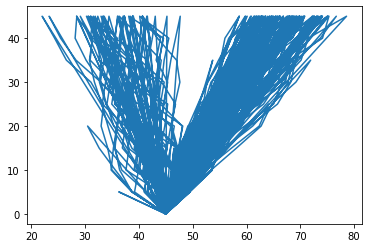

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

plt.plot(df["tumor_volume_mm3"], df["timepoint"])
plt.show

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
